<a href="https://colab.research.google.com/github/tta2yta/failure-prediction-for-mechanized-oil-equipment/blob/feature-branch/CNN_Model_Final_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, glob
import csv
import ntpath
from google.colab import drive
import glob
import seaborn as sns
import seaborn as sns1
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve, precision_score, f1_score

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = glob.glob("/content/drive/MyDrive/Colab Notebooks/final_project/data/data-one-1/*.csv", recursive=True)

In [6]:
ctr=0
all_df=[]
sensorData=""
for file_name in file_path:
      ctr= ctr + 1
      # print("File Name=", file_name)
      file = open(file_name, encoding="utf8")
      reader = csv.reader(file)
      lines= len(list(reader))
      file.close()
      df = pd.read_csv(file_name)
      df.columns = df.columns.str.strip()
      # print(df['1.csv'].max(),"  ", df['2.csv'].max(),"  ", df['3.csv'].max(),"  ", df['4.csv'].max(),"  ", df['5.csv'].max(),"  " ,df['6.csv'].max())
      # print("\n")
      df = df.drop(df[df['1.csv'] >= 1000].index)
      df = df.drop(df[df['2.csv'] >= 1000].index)
      df = df.drop(df[df['3.csv'] >= 1000].index)
      df = df.drop(df[df['4.csv'] >= 1000].index)
      df = df.drop(df[df['5.csv'] >= 1000].index)
      df = df.drop(df[df['6.csv'] >= 1000].index)
      # print(df['1.csv'].max(),"  ", df['2.csv'].max(),"  ", df['3.csv'].max(),"  ", df['4.csv'].max(),"  ", df['5.csv'].max(),"  " ,df['6.csv'].max())
      # print("\n")
      all_df.append(df)

In [7]:
sensorData=pd.concat(all_df)

In [8]:
sensorData

,Unnamed: 0,Unnamed: 0.1,1.csv,2.csv,3.csv,4.csv,5.csv,6.csv,date,failure
0,0,0,49.250000,85.666667,60.000000,65.777778,62.400000,408.750000,2016-01-13,0
1,1,1,49.653846,85.931034,60.000000,66.200000,62.790698,411.611940,2016-01-15,0
2,2,2,48.438571,87.977401,60.000000,63.514493,62.377451,410.214765,2016-01-16,0
3,3,3,45.773913,95.494565,55.465745,60.118644,64.045226,408.220126,2016-01-17,0
4,4,4,49.760870,85.436275,60.000000,65.498069,62.461538,411.793333,2016-01-18,0
...,...,...,...,...,...,...,...,...,...,...
999,999,972,3.066667,29.725796,46.928237,49.069939,38.600000,3.000000,2018-12-22,0
1000,1000,973,3.660000,0.000000,46.928237,49.069939,34.282123,2.880000,2018-12-23,0
1001,1001,974,3.323944,29.725796,46.928237,49.069939,34.282123,3.000000,2018-12-24,0
1002,1002,975,2.780488,29.725796,46.928237,49.069939,34.282123,3.000000,2018-12-25,0


No handles with labels found to put in legend.


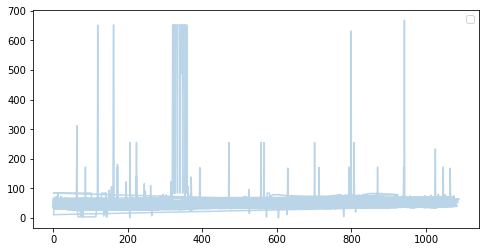

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(sensorData.iloc[:,6], alpha=0.3)
plt.legend(); plt.show()

No handles with labels found to put in legend.


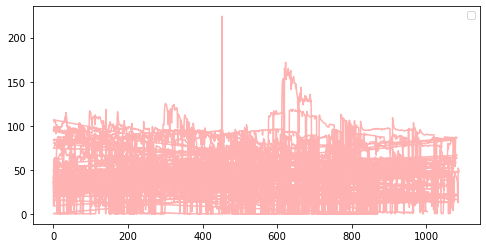

No handles with labels found to put in legend.


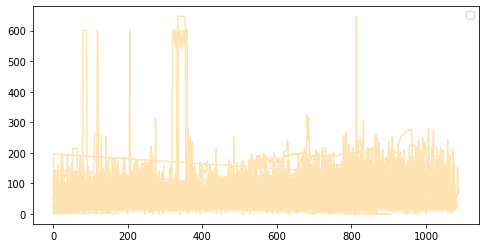

No handles with labels found to put in legend.


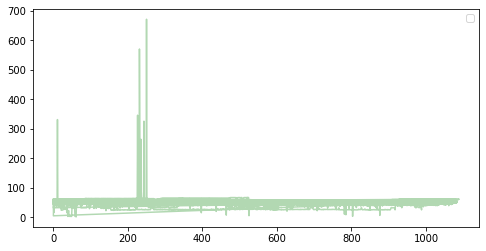

No handles with labels found to put in legend.


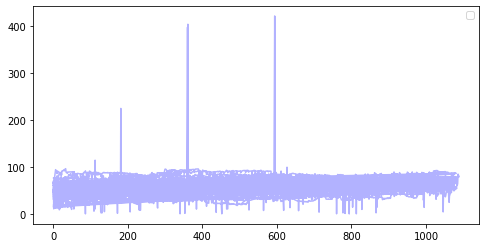

No handles with labels found to put in legend.


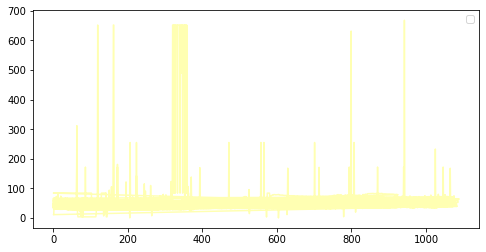

No handles with labels found to put in legend.


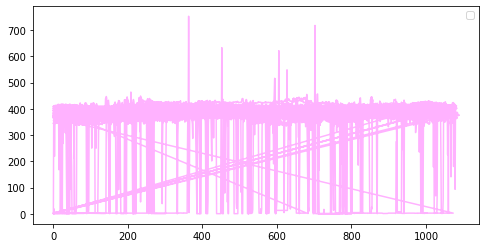

In [11]:
color = {2:'red', 3:'orange', 4:'green', 5:'blue', 6:'yellow', 7:'magenta'}
for i in range (2,8):
    
    plt.figure(figsize=(8,4))
    plt.plot(sensorData.iloc[:,i], c=color[i], alpha=0.3)
    plt.legend(); plt.show()

In [14]:
sensorData=sensorData.drop(sensorData.columns[[0,1,8]], axis=1)

In [15]:
sensorData= sensorData.drop(sensorData[sensorData.failure==4].index)

In [16]:
list_in=[]
SelectedSensorData = pd.DataFrame(columns=['1.csv','2.csv','3.csv','4.csv','5.csv','6.csv','failure'])
for i in range (0, len(sensorData.index)):
  if (sensorData.iloc[i, 6]==1 or sensorData.iloc[i, 6]==2 or sensorData.iloc[i, 6]==3 or sensorData.iloc[i, 6]==4):
      if(i + 30 > len(sensorData.index) - 1):
        #  print(SelectedSensorData.append(sensorData.iloc[i,: ]))
         SelectedSensorData=SelectedSensorData.append(sensorData.iloc[i,: ])
      else:
        rang= i - 20 if i >= 20 else 0
        # print(SelectedSensorData.append(sensorData.iloc[rang:i + 20: ]))
        SelectedSensorData=SelectedSensorData.append(sensorData.iloc[rang:i + 20: ])

In [17]:
SelectedSensorData.drop_duplicates(inplace=True)

In [18]:
SelectedSensorData

,1.csv,2.csv,3.csv,4.csv,5.csv,6.csv,failure
58,47.522642,88.570652,59.089508,63.875969,63.899038,413.946154,0
59,49.378161,92.782443,56.236767,65.585821,65.414141,412.405303,0
60,49.180597,85.335766,60.000000,64.943320,63.102564,414.485816,0
61,49.254839,85.076923,60.000000,65.085366,63.286585,412.960145,0
62,49.098667,85.077419,60.000000,64.893443,63.333333,415.333333,0
...,...,...,...,...,...,...,...
934,2.000000,27.400714,40.958333,79.158087,45.400000,3.000000,0
935,1.028846,24.970559,44.762069,65.159412,59.941176,2.125000,0
936,1.166667,21.967814,46.928237,49.069939,38.346154,1.941176,0
937,1.212121,17.996972,46.928237,49.069939,36.541667,1.764706,0


In [ ]:
pip install tsmoothie

In [ ]:
from tsmoothie.smoother import *
from tsmoothie.utils_func import create_windows
smoother = KalmanSmoother(component='level_longseason', 
                          component_noise={'level':0.1, 'longseason':0.1}, 
                          n_longseasons=365)
hhh=smoother.smooth(SelectedSensorData[['1.csv','2.csv','3.csv','4.csv','5.csv','6.csv']].T)

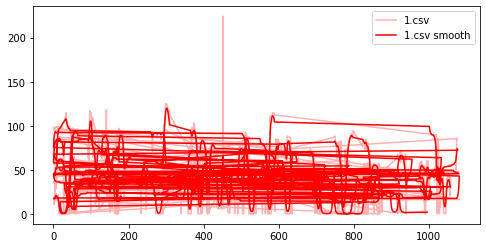

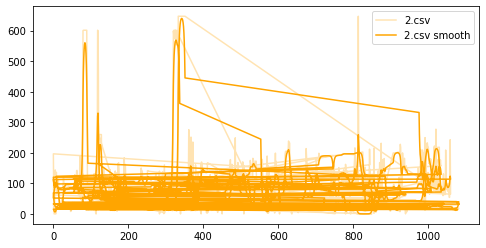

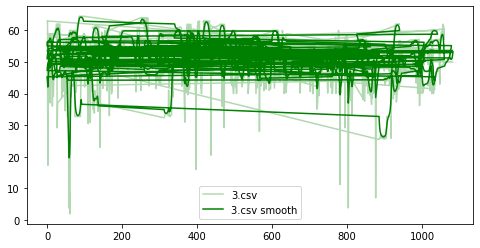

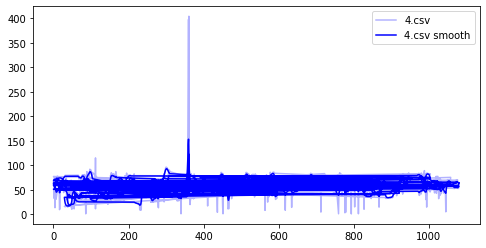

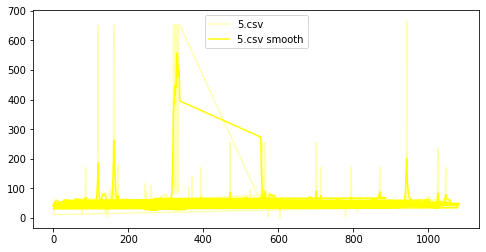

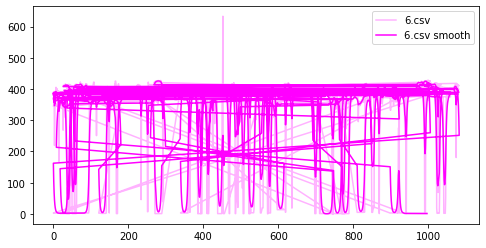

In [ ]:
color = {0:'red', 1:'orange', 2:'green', 3:'blue', 4:'yellow', 5:'magenta'}
for i,name in enumerate(SelectedSensorData.columns):
    if(i==6):
      break
    plt.figure(figsize=(8,4))
    plt.plot(SelectedSensorData.index, smoother.data[i], c=color[i], label=name, alpha=0.3)
    plt.plot(SelectedSensorData.index, smoother.smooth_data[i], c=color[i], label=name+' smooth')
    plt.legend(); plt.show()

In [ ]:
smoother.smooth_data.shape

(6, 4128)

In [ ]:
smoothed=pd.DataFrame(smoother.smooth_data)

In [ ]:
smoothed=smoothed.transpose()

In [ ]:
smoothed

,0,1,2,3,4,5
0,48.210260,87.472779,58.196939,64.215739,63.719895,410.181021
1,48.524413,87.758230,58.314768,64.506233,63.818453,411.376058
2,48.667422,87.028598,58.844615,64.576662,63.591382,412.341097
3,48.707415,86.627552,59.139678,64.569632,63.455679,412.853080
4,48.637605,86.526871,59.258896,64.455396,63.347492,413.319726
...,...,...,...,...,...,...
4123,1.788795,26.292032,42.891701,71.013234,42.223487,2.841943
4124,1.629705,25.367100,43.993186,65.656439,43.409128,2.336123
4125,1.595794,24.520438,44.942927,60.393487,41.286548,1.917638
4126,1.652715,24.183639,45.497238,57.391868,39.750902,1.539660


In [ ]:
smoothed['failure']=SelectedSensorData['failure'].values

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(smoothed.iloc[:,0:6])

In [ ]:
scaled=np.c_[scaled, smoothed.iloc[:,6]]

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(SelectedSensorData.iloc[:,0:6])

In [ ]:
scaled=np.c_[scaled, SelectedSensorData.iloc[:,6]]

In [ ]:
train,test = scaled[0:3278], scaled[3278:]

In [ ]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [ ]:
def label_class(series):
  y_label=[]
  for t_sapn in series:
    # for zz in t_sapn:
    # print(t_sapn)
    # print(t_sapn[:,6])
    if( 1 in t_sapn[:,6]):
      # print('exist')
      y_label.append(1)
    elif( 2 in t_sapn[:,6]):
      y_label.append(2)
    elif( 3 in t_sapn[:,6]):
      y_label.append(3)
    else:
      y_label.append(0)

  return y_label


In [ ]:
n_past = 3
n_future = 1
n_features = 7
n_features_no_s1=6

In [ ]:
X_train, y_train = split_series(train,n_past, n_future)
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features_no_s1))
# y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features_no_s1))
X_test, y_test = split_series(test,n_past, n_future)
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features_no_s1))
# y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features_no_s1))


In [ ]:
y_train, y_test=label_class(X_train), label_class(X_test)

In [ ]:
y_train,y_test =y_train[:,:,6], y_test[:,:,6]

In [ ]:
X_train,X_test =X_train[:,:,0:6], X_test[:,:,0:6]

In [ ]:
y_train=np.reshape(y_train, (len(y_train), 1,1))
y_test=np.reshape(y_test, (len(y_test), 1,1))

In [ ]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [ ]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
values, counts = np.unique(y_train, return_counts=True)
print(values, counts)

[0. 1. 2. 3.] [3189   34   25   27]


In [ ]:
np.shape(y_train)

(3275,)

In [ ]:
from keras.utils.np_utils import to_categorical

y_train1 = to_categorical(y_train.reshape(-1,1), num_classes=4)
y_test1=to_categorical(y_test.reshape(-1,1), num_classes=4)

In [ ]:
from keras.utils.np_utils import to_categorical

y_train1 = to_categorical(np.reshape(y_train, (-1,1)), num_classes=4)
y_test1=to_categorical(np.reshape(y_test, (-1,1)), num_classes=4)

In [ ]:
y_train1=y_train1.reshape(-1,4)
y_test1=y_test1.reshape(-1,4)

In [ ]:
y_train1.argmax(1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
values, counts = np.unique(y_train1.argmax(1), return_counts=True)
print(values, counts)

[0 1 2 3] [3189   34   25   27]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D, AveragePooling1D
from keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]

In [ ]:
METRICS1 = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]

In [ ]:
jj=y_train1.reshape(-1,4)

In [ ]:
jj.argmax(1)

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
jj=y_train1.reshape(-1,4)
sample_weight = np.ones(shape=(len(y_train1),))
for i in range(len(jj.argmax(1))):
  if(jj.argmax(1)[i]==1):
    sample_weight[i]=24
  if(jj.argmax(1)[i]==2):
    sample_weight[i]=32
  if(jj.argmax(1)[i]==3):
    sample_weight[i]=28

In [ ]:
num_sensors = 6
TIME_PERIODS = 3
BATCH_SIZE = 1000
EPOCHS = 10
output_bias=0.22
# sample_weight = np.ones(shape=(len(y_train),))
# sample_weight[y_train.reshape(y_train.shape[0]) == 1] = 10
# sample_weight[y_train.reshape(y_train.shape[0]) == 0] = 0.5

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=1e-6)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model = Sequential()
model.add(Conv1D(8, 6, padding='same', activation='relu', input_shape=(3, n_features-1)))
model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'))
# model.add(Conv1D(filters=128, kernel_size=3, padding="same"))
# model.add(Conv1D(filters=8, kernel_size=1))
# model.add(Conv1D(filters=8, kernel_size=1))
# model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=3, padding='same'))


# model.add(Conv1D(64, (3), input_shape=(1, n_features-1), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.l2(1e-4),
#     activity_regularizer=regularizers.l2(1e-5)))
# model.add(Activation("relu"))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.7))

# model.add(Conv1D(32, (1), input_shape=(3, n_features-1), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.l2(1e-4),
#     activity_regularizer=regularizers.l2(1e-5)))
# model.add(Activation("relu"))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.7))
#  kernel_regularizer=regularizers.l1_l2( l2=0.001),activation='relu'
model.add(Flatten())
# model.add(Dense(4, activation='relu'))
# model.add(Dense(32))
# model.add(Dense(32))
# model.add(Dense(32))
# model.add(Dropout(0.2))
# model.add(Dense(10))
# model.add(Dropout(0.2))
# model.add(Dense(32, kernel_regularizer=regularizers.l1_l2( l2=0.0001)))
# model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


In [ ]:
bb=y_train.reshape(-1)
aa=y_test.reshape(-1)

In [ ]:
optimizer = tf.keras.optimizers.Adam(1)
optimizer.learning_rate.assign(1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
opt = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-6, clipvalue=0.5)
# sample_weight[y_train.reshape(y_train.shape[0]) == 1] = 11.5

# latest = tf.train.latest_checkpoint(checkpoint_dir)

# Load the previously saved weights
# model.load_weights(latest)


# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=METRICS)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# model.compile(
#             optimizer=keras.optimizers.Adadelta(),
#             loss='sparse_categorical_crossentropy',
#             metrics=['sparse_categorical_accuracy'])


In [ ]:
for i in range(0,1):
  # res=model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test,y_test), verbose=2, shuffle=False, callbacks=[reduce_lr])
  res=model.fit(X_train, y_train1, epochs=2000, batch_size=100, validation_data=(X_test, y_test1), verbose=2, shuffle=False, sample_weight=sample_weight)
# model.save_weights(checkpoint_path.format(epoch=0))

Epoch 1/2000
33/33 - 1s - loss: 2.0227 - accuracy: 0.9450 - val_loss: 0.6634 - val_accuracy: 0.9728
Epoch 2/2000
33/33 - 0s - loss: 1.9684 - accuracy: 0.9737 - val_loss: 0.6025 - val_accuracy: 0.9728
Epoch 3/2000
33/33 - 0s - loss: 1.9612 - accuracy: 0.9737 - val_loss: 0.5985 - val_accuracy: 0.9728
Epoch 4/2000
33/33 - 0s - loss: 1.9558 - accuracy: 0.9737 - val_loss: 0.5963 - val_accuracy: 0.9728
Epoch 5/2000
33/33 - 0s - loss: 1.9505 - accuracy: 0.9737 - val_loss: 0.5910 - val_accuracy: 0.9728
Epoch 6/2000
33/33 - 0s - loss: 1.9461 - accuracy: 0.9737 - val_loss: 0.5877 - val_accuracy: 0.9728
Epoch 7/2000
33/33 - 0s - loss: 1.9411 - accuracy: 0.9737 - val_loss: 0.5780 - val_accuracy: 0.9728
Epoch 8/2000
33/33 - 0s - loss: 1.9366 - accuracy: 0.9737 - val_loss: 0.5734 - val_accuracy: 0.9728
Epoch 9/2000
33/33 - 0s - loss: 1.9317 - accuracy: 0.9737 - val_loss: 0.5730 - val_accuracy: 0.9728
Epoch 10/2000
33/33 - 0s - loss: 1.9268 - accuracy: 0.9737 - val_loss: 0.5676 - val_accuracy: 0.9728

In [ ]:
kk=model.predict(X_train)

In [ ]:
test_res=model.predict(X_test)

In [ ]:
kk.argmax(1)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
for i in range((kk.shape[1])):
  for j in range((kk.shape[0])):
    if(kk[j,i] >= 0.5):
      kk[j,i]=1
    else:
      kk[j,i]=0

In [ ]:
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve, precision_score, f1_score
cf_matrix_train=confusion_matrix(y_train1.argmax(1), kk.argmax(1))
print(confusion_matrix(y_train1.argmax(1), kk.argmax(1)))

[[2403  758   18   10]
 [  10   24    0    0]
 [  12   12    1    0]
 [  21    3    0    3]]


In [ ]:
for i in range((test_res.shape[1])):
  for j in range((test_res.shape[0])):
    if(test_res[j,i] >= 0.5):
      test_res[j,i]=1
    else:
      test_res[j,i]=0

In [ ]:
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve, precision_score, f1_score
cf_matrix_test=confusion_matrix(y_test1.argmax(1), test_res.argmax(1))
print(confusion_matrix(y_test1.argmax(1), test_res.argmax(1)))

[[603 200   5  16]
 [  6   4   0   0]
 [  2   1   0   0]
 [  7   2   0   1]]


In [ ]:
np.seterr(divide='ignore', invalid='ignore')
recall = np.diag(cf_matrix_test) / np.sum(cf_matrix_test, axis = 1)
precision = np.diag(cf_matrix_test) / np.sum(cf_matrix_test, axis = 0)
print("Precision=", np.nanmean(precision))
print("Recall=", np.mean(recall))

Precision= 0.26346883906228874
Recall= 0.3079490291262136


In [ ]:
precision

array([0.97036082, 0.        , 0.        , 0.        ])

In [ ]:
np.mean(recall)


0.22845873786407767

In [ ]:
np.nanmean(precision)

0.242590206185567

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')
        # print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<b>training</b>

Confusion matrix
[[2403  758   18   10]
 [  10   24    0    0]
 [  12   12    1    0]
 [  21    3    0    3]]


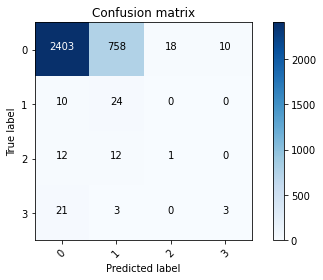

In [ ]:
plot_confusion_matrix(cf_matrix_train, classes=['0', '1', '2','3'],
                      title='Confusion matrix')

<b>Testing result</b>

Confusion matrix
[[603 200   5  16]
 [  6   4   0   0]
 [  2   1   0   0]
 [  7   2   0   1]]


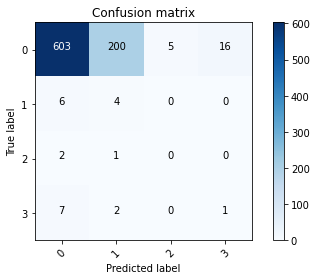

In [ ]:
plot_confusion_matrix(cf_matrix_test, classes=['0', '1', '2','3'],
                      title='Confusion matrix')

In [ ]:
from keras.models import model_from_json


file_path="/content/drive/MyDrive/Colab Notebooks/final_project/data/"
# serialize model to JSON
model_json = model.to_json()
with open(file_path + "CNN-model-8-512-6-3", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5

model.save_weights(file_path + "CNN-model_weight-8-512-6-3.h5")

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
n_classes=4
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], test_res[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
test_res[:,0]

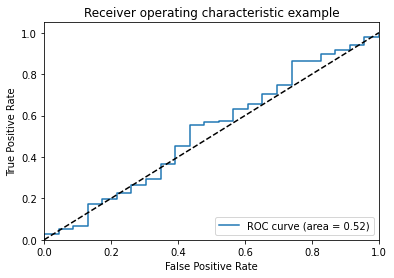

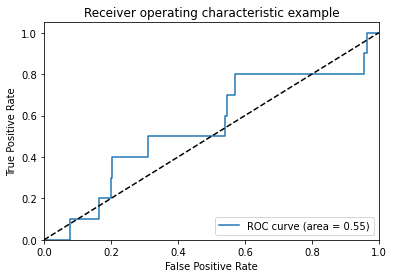

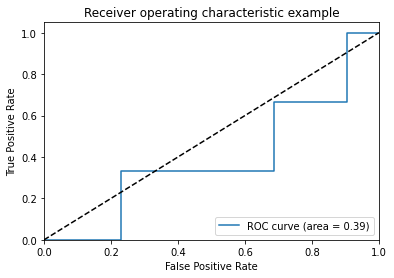

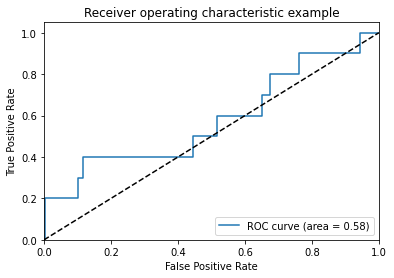

In [ ]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

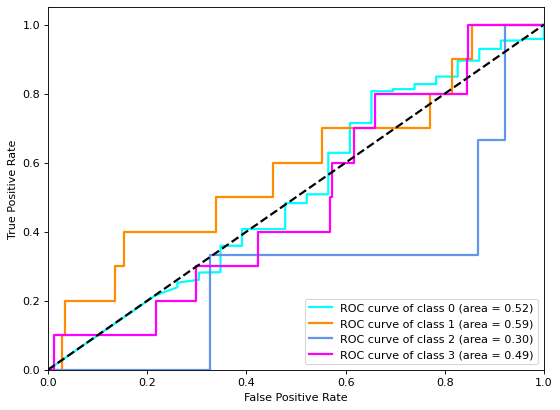

In [ ]:
from itertools import cycle
from matplotlib.pyplot import figure
lw=2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'magenta'])
figure(figsize=(8, 6), dpi=80)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()